# Домашнее задание 1. Кластеризация векторного пространства

In [0]:
import urllib.request
import gensim
import re
import numpy as np
from gensim.models import word2vec

In [2]:
urllib.request.urlretrieve("https://rusvectores.org/static/models/rusvectores4/taiga/taiga_upos_skipgram_300_2_2018.vec.gz", "taiga_upos_skipgram_300_2_2018.vec.gz")

('taiga_upos_skipgram_300_2_2018.vec.gz',
 <http.client.HTTPMessage at 0x7fcb285dc518>)

In [3]:
m = 'taiga_upos_skipgram_300_2_2018.vec.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


### Задача 1: извлечение из модели вектора для глагола и существительного из списка

In [0]:
with open('Sigdel.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

In [5]:
nns = []
verb = ''
for phrase in lines:
    n = re.findall(r'[а-я]+', phrase)
    non = str(n[1]) + '_NOUN'
    v = str(n[0]) + '_VERB'
    nns.append(non)
    if verb == '':
        verb = v

print(nns)
print(verb)

['письмо_NOUN', 'возможность_NOUN', 'ответ_NOUN', 'название_NOUN', 'деньги_NOUN', 'известие_NOUN', 'результат_NOUN', 'разрешение_NOUN', 'телеграмма_NOUN', 'приглашение_NOUN', 'место_NOUN', 'сведение_NOUN', 'информация_NOUN', 'приказ_NOUN', 'данные_NOUN', 'образование_NOUN', 'человек_NOUN', 'отказ_NOUN', 'звание_NOUN', 'диплом_NOUN', 'право_NOUN', 'назначение_NOUN', 'приказание_NOUN', 'распространение_NOUN', 'удовольствие_NOUN', 'награда_NOUN', 'премия_NOUN', 'время_NOUN', 'год_NOUN', 'развитие_NOUN', 'согласие_NOUN', 'работа_NOUN', 'задание_NOUN', 'свобода_NOUN', 'ранение_NOUN', 'доступ_NOUN', 'сообщение_NOUN', 'приз_NOUN', 'имя_NOUN', 'квартира_NOUN', 'орден_NOUN', 'россия_NOUN', 'наследство_NOUN', 'значение_NOUN', 'поддержка_NOUN', 'задача_NOUN', 'статус_NOUN', 'признание_NOUN', 'одобрение_NOUN', 'власть_NOUN', 'записка_NOUN', 'чин_NOUN', 'заказ_NOUN', 'удар_NOUN', 'жизнь_NOUN', 'лицензия_NOUN', 'предложение_NOUN', 'день_NOUN', 'билет_NOUN', 'воспитание_NOUN', 'бумага_NOUN', 'подтвер

In [0]:
nouns = {}
for noun in nns:
    if noun in model:
        nouns[noun] = model[noun]
    else:
        print('Увы, слова "%s" нет в модели!' % noun)

In [0]:
verbs = {}

verb_val = model[verb]
verbs[verb] = verb_val

### Задача 2: построение репрезентации пары "глагол+существительное" с помощью простой аддитивной модели композиции

In [0]:
import numpy as np

In [9]:
phrase_dict = {}
nms_ph = []
for k, v in nouns.items():
    dt = v+verb_val
    phrs = verb + "_" + k
    print(phrs)
    nms_ph.append(phrs)
    phrase_dict[phrs] = dt

получить_VERB_письмо_NOUN
получить_VERB_возможность_NOUN
получить_VERB_ответ_NOUN
получить_VERB_название_NOUN
получить_VERB_деньги_NOUN
получить_VERB_известие_NOUN
получить_VERB_результат_NOUN
получить_VERB_разрешение_NOUN
получить_VERB_телеграмма_NOUN
получить_VERB_приглашение_NOUN
получить_VERB_место_NOUN
получить_VERB_сведение_NOUN
получить_VERB_информация_NOUN
получить_VERB_приказ_NOUN
получить_VERB_данные_NOUN
получить_VERB_образование_NOUN
получить_VERB_человек_NOUN
получить_VERB_отказ_NOUN
получить_VERB_звание_NOUN
получить_VERB_диплом_NOUN
получить_VERB_право_NOUN
получить_VERB_назначение_NOUN
получить_VERB_приказание_NOUN
получить_VERB_распространение_NOUN
получить_VERB_удовольствие_NOUN
получить_VERB_награда_NOUN
получить_VERB_премия_NOUN
получить_VERB_время_NOUN
получить_VERB_год_NOUN
получить_VERB_развитие_NOUN
получить_VERB_согласие_NOUN
получить_VERB_работа_NOUN
получить_VERB_задание_NOUN
получить_VERB_свобода_NOUN
получить_VERB_ранение_NOUN
получить_VERB_доступ_NOUN
полу

### Задача 3: сбор векторных представлений пар в матрицу и кластеризация 2 способами

In [0]:
import pandas as pd

In [0]:
phrase_data = np.array([v for k, v in phrase_dict.items()])

In [12]:
phrase_data

array([[ 0.05109471,  0.1576732 , -0.07163855, ..., -0.02446205,
         0.06681655, -0.10603048],
       [ 0.00916389,  0.08817736,  0.15624541, ..., -0.01546127,
         0.0058404 ,  0.1321214 ],
       [ 0.03304953,  0.18144673,  0.00548003, ..., -0.02272832,
         0.014006  , -0.04490275],
       ...,
       [ 0.11389516,  0.11784659,  0.14028835, ..., -0.14302573,
         0.00882937, -0.02261988],
       [-0.01242107,  0.19492951,  0.0587735 , ..., -0.01816176,
         0.09511568,  0.01219948],
       [-0.04056606,  0.11598365, -0.06982552, ..., -0.10982108,
         0.01526136, -0.00613313]], dtype=float32)

In [13]:
count_df = pd.DataFrame(
    np.array(phrase_data, dtype='float64'),
    index=[k for k, v in phrase_dict.items()])
count_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
получить_VERB_письмо_NOUN,0.051095,0.157673,-0.071639,0.048771,-0.045191,0.038395,0.063348,-0.036304,0.055301,-0.091746,-0.053083,0.013778,-0.095105,0.003720,-0.024384,0.020935,-0.015492,0.149289,0.057332,-0.054397,0.059132,0.011889,0.111972,-0.081220,0.036182,-0.009561,0.093482,0.055313,0.042608,-0.133337,0.056936,0.004092,0.127959,0.089858,-0.023930,0.009581,0.160268,0.057857,0.193840,0.027888,...,-0.117849,0.017122,0.017782,-0.035238,0.000738,0.105020,-0.157067,0.050514,-0.041549,0.104802,-0.122470,-0.052482,0.055948,0.074042,0.070357,0.011338,-0.125690,-0.094714,-0.016578,-0.058636,-0.008481,-0.024289,0.024763,0.088798,0.037742,0.060717,0.023731,-0.055936,0.048510,0.031883,0.041132,-0.019613,0.024523,0.122099,0.065081,0.016653,-0.116494,-0.024462,0.066817,-0.106030
получить_VERB_возможность_NOUN,0.009164,0.088177,0.156245,0.028028,-0.107609,0.075140,0.055444,0.032029,-0.020473,-0.098450,0.050436,-0.058839,-0.082188,-0.066244,-0.003470,-0.046924,-0.021924,0.127817,0.018045,0.012438,0.135275,-0.088958,0.087743,0.064625,0.069412,-0.033655,0.103924,0.075726,0.036315,-0.125154,0.053285,0.107057,0.045279,0.032980,0.019710,-0.054158,0.200866,0.068113,0.168491,-0.020356,...,-0.150962,0.096413,0.062784,0.032131,0.046535,0.038403,-0.118819,-0.122351,-0.050653,0.110380,-0.094683,-0.088113,-0.011501,0.049115,0.003924,0.014044,-0.048350,-0.083852,-0.146079,-0.036445,0.032607,-0.089564,0.176194,0.043406,0.057917,0.134754,0.086042,0.033571,0.007593,-0.045467,0.008757,0.013107,-0.027707,0.147118,0.065237,-0.042836,-0.050574,-0.015461,0.005840,0.132121
получить_VERB_ответ_NOUN,0.033050,0.181447,0.005480,0.027571,-0.152069,0.050960,0.024705,0.098617,0.022942,-0.093964,-0.005328,-0.007176,-0.081235,-0.077060,0.010926,-0.008586,0.022796,0.153009,-0.045217,0.031334,0.197231,-0.022808,0.103277,-0.002995,-0.019457,0.049360,0.163656,-0.033967,0.083608,-0.083127,0.093300,0.004495,0.045340,0.132147,-0.060180,-0.025974,0.114902,0.017596,0.138874,0.052476,...,-0.141466,0.022412,0.064387,0.027714,-0.057217,0.011926,-0.053469,-0.107355,-0.040716,0.154192,-0.019941,0.017603,0.042859,0.034265,-0.027635,0.039384,-0.145768,-0.067354,-0.009723,-0.002710,0.003933,0.026294,0.164339,-0.038333,0.064834,0.077046,0.131422,-0.030537,0.051967,-0.014632,0.106353,-0.047529,0.019724,0.109420,0.082595,-0.024247,-0.122164,-0.022728,0.014006,-0.044903
получить_VERB_название_NOUN,0.054521,0.146618,0.071679,0.013398,-0.136450,0.004031,0.180873,0.041028,0.015866,-0.099398,-0.042676,0.030185,-0.083086,0.036024,0.044585,-0.056173,-0.084317,0.178195,0.050139,-0.012156,0.055484,-0.027774,0.155215,0.034966,0.090181,-0.067119,0.114114,-0.046944,0.015931,-0.108359,0.102822,0.025575,0.005207,0.023422,-0.071073,0.019824,0.086008,0.077978,0.218156,0.008455,...,-0.155864,0.026109,0.028080,-0.047617,-0.016466,-0.030985,-0.104178,-0.049421,0.014328,0.144525,0.010103,-0.059338,0.027786,-0.028768,-0.010292,0.031199,-0.102880,-0.025090,-0.050517,-0.101862,0.004964,0.137925,0.177927,-0.001098,0.038563,0.024093,0.105341,-0.009476,0.027379,-0.112049,-0.019659,0.021693,0.015070,0.093330,0.083563,-0.027200,-0.086549,-0.136849,0.023600,-0.011199
получить_VERB_деньги_NOUN,0.032321,0.043752,0.055684,0.052862,-0.072184,0.082391,0.079420,0.038304,-0.006256,-0.020788,-0.014499,0.057213,-0.149981,-0.050917,0.061985,0.053306,-0.073248,0.136346,0.069476,0.004373,0.075197,0.000025,0.072806,-0.011832,0.047179,-0.030231,-0.000799,0.100623,0.006465,-0.077001,0.035296,0.033697,0.017549,0.096659,0.013182,-0.047961,0.191366,0.075967,0.222437,0.011090,...,-0.092666,0.107778,0.027525,-0.056469,0.041812,0.101363,-0.087261,-0.074768,-0.009131,0.176996,-0.095388,-0.064000,0.005609,0.125557,0.046304,0.082346,0.008568,-0.117683,-0.115323,-0.037506

#### 1. Метод иерархической кластеризации

In [0]:
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy as hcluster

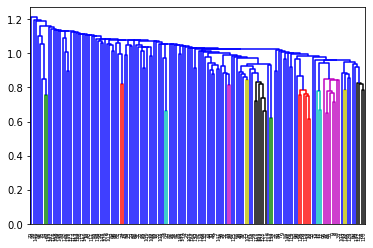

In [15]:
Z = hcluster.linkage(phrase_data)
plt.figure()
dn = hcluster.dendrogram(Z)
# plt.show()
plt.savefig('plot.png', dpi=1000)

In [16]:
clusters = hcluster.fcluster(Z, 1)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 75


In [17]:
clusters = hcluster.fcluster(Z, 1.2)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 1


In [18]:
clusters = hcluster.fcluster(Z, 1.1)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 68


In [19]:
clusters = hcluster.fcluster(Z, 0.6)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 119


In [20]:
clusters = hcluster.fclusterdata(phrase_data, 1.1)
print('Estimated number of clusters: %d' % len(set(clusters)))

Estimated number of clusters: 68


In [21]:
clusters

array([26,  5, 36,  8, 15, 26,  4, 12, 26, 20, 52, 26, 26, 23, 26,  6,  7,
       44, 15, 27, 35, 40, 23,  6, 10, 15, 15,  7,  7,  6, 11,  7, 19, 43,
        1, 49, 26, 15,  8, 61, 15,  2, 38, 51, 11, 19, 15, 18, 11,  2, 26,
       15, 39,  1, 48, 27, 20,  7, 29,  6, 27, 21, 22,  1, 23, 15, 16, 15,
       27,  7, 15, 15, 26, 13, 15, 28,  1, 31,  5, 68, 25, 26,  5, 41, 32,
       45, 55, 46,  9,  4, 24,  1,  5,  8, 27, 26,  4, 15,  3, 67, 47, 15,
        7,  4, 27, 42, 34, 15, 62,  7, 27, 50, 15, 57, 58, 15, 63, 54, 23,
       21,  2, 27, 27, 59, 27, 15, 22, 33, 15, 56, 14, 15, 10, 15, 27, 65,
        3,  2, 17, 15, 53, 12, 64, 30,  9, 60, 66, 15,  3, 37],
      dtype=int32)

In [22]:
cl = {}
for el in clusters:
    if el not in cl:
        cl[el] = 1
    else:
        cl[el] += 1

# сколько кластеров имеют больше 3 элементов
nes = []
for k, v in cl.items():
    if v >= 3:
        print(k, v)
        nes.append(k)

26 11
5 4
8 3
15 24
4 4
23 4
6 4
7 8
27 11
11 3
1 5
2 4
3 3


***Возможное объяснение***: 
В данном случае достаточно сложно определить, какой именно порог t лучше использовать: количество кластеров определяется автоматически и, чем меньший порог мы задаем, тем больше кластеров получается. Так как в словарях выделяется намного меньше кластеров (в словаре Ожегова, на который я опиралась в выборе количества классов, их всего 6), чем 119 (при пороге в 0.6 и ниже) - максимальное количество - лучше всего - стараться сминимизировать количество кластеров. Поэтому, самым оптимальным вариантом кажется вариант с порогом в 1.1 - 68 кластеров (это минимальный вариант при десятичном пороге), 13 с количеством слов больше 2 (что уже выглядит намного более близким к реальности). (75 кластеров при пороге 1, уже немного больше, чем нужно)

In [0]:
# Готовим данные для 4 задания: собираем слова для каждого кластера
w1 = [i for i, ltr in enumerate(list(clusters)) if ltr == nes[0]]
w2 = [i for i, ltr in enumerate(list(clusters)) if ltr == nes[1]]
w3 = [i for i, ltr in enumerate(list(clusters)) if ltr == nes[2]]
w4 = [i for i, ltr in enumerate(list(clusters)) if ltr == nes[3]]
w5 = [i for i, ltr in enumerate(list(clusters)) if ltr == nes[4]]
w6 = [i for i, ltr in enumerate(list(clusters)) if ltr == nes[5]]
w7 = [i for i, ltr in enumerate(list(clusters)) if ltr == nes[6]]
w8 = [i for i, ltr in enumerate(list(clusters)) if ltr == nes[7]]
w9 = [i for i, ltr in enumerate(list(clusters)) if ltr == nes[8]]
w10 = [i for i, ltr in enumerate(list(clusters)) if ltr == nes[9]]
w11 = [i for i, ltr in enumerate(list(clusters)) if ltr == nes[10]]
w12 = [i for i, ltr in enumerate(list(clusters)) if ltr == nes[11]]
w13 = [i for i, ltr in enumerate(list(clusters)) if ltr == nes[12]]

In [0]:
pr1 = [nms_ph[n] for n in w1]
pr2 = [nms_ph[n] for n in w2]
pr3 = [nms_ph[n] for n in w3]
pr4 = [nms_ph[n] for n in w4]
pr5 = [nms_ph[n] for n in w5]
pr6 = [nms_ph[n] for n in w6]
pr7 = [nms_ph[n] for n in w7]
pr8 = [nms_ph[n] for n in w8]
pr9 = [nms_ph[n] for n in w9]
pr10 = [nms_ph[n] for n in w10]
pr11 = [nms_ph[n] for n in w11]
pr12 = [nms_ph[n] for n in w12]
pr13 = [nms_ph[n] for n in w13]

In [0]:
# словари для слов каждого кластера
ind_cl1 = {}
ind_cl2 = {}
ind_cl3 = {}
ind_cl4 = {}
ind_cl5 = {}
ind_cl6 = {}
ind_cl7 = {}
ind_cl8 = {}
ind_cl9 = {}
ind_cl10 = {}
ind_cl11 = {}
ind_cl12 = {}
ind_cl13 = {}

for k, v in phrase_dict.items():
    for e in pr1:
        if k == e:
            ind_cl1[k] = v

for k, v in phrase_dict.items():
    for e in pr2:
        if k == e:
            ind_cl2[k] = v

for k, v in phrase_dict.items():
    for e in pr3:
        if k == e:
            ind_cl3[k] = v

for k, v in phrase_dict.items():
    for e in pr4:
        if k == e:
            ind_cl4[k] = v

for k, v in phrase_dict.items():
    for e in pr5:
        if k == e:
            ind_cl5[k] = v

for k, v in phrase_dict.items():
    for e in pr6:
        if k == e:
            ind_cl6[k] = v

for k, v in phrase_dict.items():
    for e in pr7:
        if k == e:
            ind_cl7[k] = v

for k, v in phrase_dict.items():
    for e in pr8:
        if k == e:
            ind_cl8[k] = v

for k, v in phrase_dict.items():
    for e in pr9:
        if k == e:
            ind_cl9[k] = v

for k, v in phrase_dict.items():
    for e in pr10:
        if k == e:
            ind_cl10[k] = v

for k, v in phrase_dict.items():
    for e in pr11:
        if k == e:
            ind_cl11[k] = v

for k, v in phrase_dict.items():
    for e in pr12:
        if k == e:
            ind_cl12[k] = v

for k, v in phrase_dict.items():
    for e in pr13:
        if k == e:
            ind_cl13[k] = v

#### Алгоритм К-средних

In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=6).fit(phrase_data)
clasters2 = kmeans.labels_

In [28]:
clasters2

array([3, 0, 1, 2, 4, 3, 0, 1, 3, 1, 0, 3, 3, 1, 3, 2, 0, 1, 5, 5, 5, 1,
       1, 2, 1, 5, 4, 0, 0, 2, 1, 0, 3, 1, 5, 2, 3, 5, 0, 0, 5, 2, 4, 2,
       1, 2, 5, 1, 1, 2, 3, 5, 1, 3, 0, 5, 1, 0, 5, 2, 3, 1, 1, 5, 1, 4,
       4, 1, 5, 0, 5, 4, 3, 1, 4, 3, 3, 2, 0, 0, 1, 3, 1, 0, 2, 1, 0, 0,
       2, 2, 1, 3, 1, 2, 5, 3, 2, 5, 2, 0, 5, 4, 0, 2, 5, 0, 1, 5, 0, 0,
       3, 2, 1, 2, 0, 4, 2, 0, 1, 5, 0, 5, 5, 2, 5, 4, 1, 0, 4, 4, 1, 4,
       1, 4, 3, 1, 2, 2, 5, 4, 2, 1, 2, 5, 2, 2, 2, 4, 2, 1], dtype=int32)

In [29]:
cl2 = {}
for el in clasters2:
    if el not in cl2:
        cl2[el] = 1
    else:
        cl2[el] += 1

# сколько кластеров имеют больше 3 элементов
for k, v in cl2.items():
    if v >= 2:
        print(k, v)

3 19
0 26
1 34
2 30
4 16
5 25


***Возможное объяснение***: 
для того, чтобы выбрать количество кластеров для алгоритма k-средних, кажется правильным составление кластеров на основе существующих словарей: [словарь Ожегова](https://glosum.ru/%D0%97%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B5-%D1%81%D0%BB%D0%BE%D0%B2%D0%B0-%D0%9F%D0%BE%D0%BB%D1%83%D1%87%D0%B8%D1%82%D1%8C) предлагает 6 возможных интрпретаций глагола "получить". 

1.   Взять, приобрести вручаемое, предлагаемое, искомое: письмо,  зарплату, звание профессора, помощника. То есть, в этот кластер можно отнести как физические предметы, так и те, что человек давно ожидает/ищет и в итоге получает (включая разного рода людей).
2.   Принять для исполнения: приказ. То есть, сюда можно отнести все, что можно осуществить (исполнить) в жизни - всякие нефизичкие элементы
3.   Добыть, произвести из че-го-н: продукт из нефти, интересные выводы. То есть, сюда относится все, что получается из чего-нибудь - как физические, так и нефизические элементы
4.   Испытать что-н., подвергнуться чему-н: удовольствие, пощечину. Сюда можно определить все, что можно связать с эмоциональной сферой
5.   Прийти в какое-н. состояние (в соответствии со значением следующего существительного): всеобщее признание (стать признанным), распространение (стать распространенным, применяющимся), известность (стать известным). Все, что может свидетельствовать об изменении состояния
6.   Подвергнуться выговору, наказанию (разг.): Что, получил от отца? Ты у меня получишь! Таким образом, это достаточно спорный кластер, однако, из-за того, что его выделяют в словарях, будет не лишним использовать его в работе.


В случае, когда у нас есть выбор количества кластеров, лучшим варинтом из определения этого количества представляется использование различных словарей. Я пересмотрела несколько штук и словарь Ожегова оказался одновременно самым емким и захватывающим разные значения слова, поэтому решила выбрать именно его.

### Задача 4: определение центра кластера и выбор трех элементов, наиболее к нему близких

Заранее прошу прощения за огромное количество повторяющихся элементов в коде для обоих алгоритмов здесь (я пыталась схлопнуть, но тогда мне было не совсем удобно следить за процессом формирования матриц и словарей, а хотелось, чтобы к любому из указанных словарей был доступ, чтобы его всегда можно было посмотреть, поэтому пришлось пожертвовать емкостью здесь (к моему огромному сожалению) ). 

Понятно, что такой "перебор" несложно делать на том количестве данных (= кластеров), который есть в задании, но будет сложно сделать с бОльшим количесвом данных (в таком случае можно использовать вложенные в список словари/списки, по аналогии с тем, как было сделано для отбора 3 слов для каждого кластера).

#### Для метода К-средних

In [0]:
from scipy.spatial import distance

In [0]:
centres = kmeans.cluster_centers_

In [32]:
centres

array([[ 0.05338495,  0.11356284,  0.07000897, ..., -0.03932901,
         0.03128886, -0.00912031],
       [ 0.04475465,  0.10836919,  0.05374227, ..., -0.04342394,
         0.00772057, -0.04605397],
       [ 0.02855935,  0.12918152,  0.07970599, ..., -0.04341106,
         0.02382142, -0.02787413],
       [ 0.01327526,  0.13196808,  0.00091738, ..., -0.04955794,
         0.0511617 , -0.06141733],
       [ 0.06309494,  0.08163024,  0.07402532, ..., -0.05485231,
         0.01295337, -0.00281055],
       [ 0.0269997 ,  0.12813115,  0.06653947, ..., -0.05776326,
         0.0494879 , -0.04391524]], dtype=float32)

In [0]:
# расчет косинусной дистанции
cnt1 = {}
cnt2 = {}
cnt3 = {}
cnt4 = {}
cnt5 = {}
cnt6 = {}

co1 = 0
for ph in phrase_data:
    cnt1[nms_ph[co1]] = distance.cosine(centres[0], ph)
    co1 += 1

co2 = 0
for ph in phrase_data:
    cnt2[nms_ph[co2]] = distance.cosine(centres[1], ph)
    co2 += 1

co3 = 0
for ph in phrase_data:
    cnt3[nms_ph[co3]] = distance.cosine(centres[2], ph)
    co3 += 1

co4 = 0
for ph in phrase_data:
    cnt4[nms_ph[co4]] = distance.cosine(centres[3], ph)
    co4 += 1

co5 = 0
for ph in phrase_data:
    cnt5[nms_ph[co5]] = distance.cosine(centres[4], ph)
    co5 += 1

co6 = 0
for ph in phrase_data:
    cnt6[nms_ph[co6]] = distance.cosine(centres[5], ph)
    co6 += 1

In [34]:
# cписок словарей
for_km1 = []
for_km1.append(cnt1)
for_km1.append(cnt2)
for_km1.append(cnt3)
for_km1.append(cnt4)
for_km1.append(cnt5)
for_km1.append(cnt6)

for e in for_km1:
    print(e)

{'получить_VERB_письмо_NOUN': 0.2148382067680359, 'получить_VERB_возможность_NOUN': 0.17618203163146973, 'получить_VERB_ответ_NOUN': 0.19207054376602173, 'получить_VERB_название_NOUN': 0.23490184545516968, 'получить_VERB_деньги_NOUN': 0.16239094734191895, 'получить_VERB_известие_NOUN': 0.2378292679786682, 'получить_VERB_результат_NOUN': 0.16420507431030273, 'получить_VERB_разрешение_NOUN': 0.23972195386886597, 'получить_VERB_телеграмма_NOUN': 0.2346949577331543, 'получить_VERB_приглашение_NOUN': 0.22913652658462524, 'получить_VERB_место_NOUN': 0.15800434350967407, 'получить_VERB_сведение_NOUN': 0.22181707620620728, 'получить_VERB_информация_NOUN': 0.19430339336395264, 'получить_VERB_приказ_NOUN': 0.2187318205833435, 'получить_VERB_данные_NOUN': 0.190679132938385, 'получить_VERB_образование_NOUN': 0.2052823305130005, 'получить_VERB_человек_NOUN': 0.140627920627594, 'получить_VERB_отказ_NOUN': 0.231975257396698, 'получить_VERB_звание_NOUN': 0.21643859148025513, 'получить_VERB_диплом_NOUN

In [35]:
# получение 3 слов
for_km2 = []
for slv in for_km1:
    fin_clas1 = {}
    for i in range(3):
        min_val1 = min(slv.values())
        for k, v in slv.items():
            if v == min_val1:
                k1 = k
        del slv[k1]
        fin_clas1[k1] = min_val1
    for_km2.append(fin_clas1)

for r in for_km2:
    print(r)

{'получить_VERB_год_NOUN': 0.13394737243652344, 'получить_VERB_человек_NOUN': 0.140627920627594, 'получить_VERB_день_NOUN': 0.14217650890350342}
{'получить_VERB_указание_NOUN': 0.11921632289886475, 'получить_VERB_распоряжение_NOUN': 0.12433332204818726, 'получить_VERB_приказ_NOUN': 0.12497490644454956}
{'получить_VERB_образование_NOUN': 0.13784074783325195, 'получить_VERB_число_NOUN': 0.13933289051055908, 'получить_VERB_оценка_NOUN': 0.14745259284973145}
{'получить_VERB_телеграмма_NOUN': 0.09307640790939331, 'получить_VERB_извещение_NOUN': 0.09857374429702759, 'получить_VERB_письмо_NOUN': 0.09888988733291626}
{'получить_VERB_зарплата_NOUN': 0.07714730501174927, 'получить_VERB_гонорар_NOUN': 0.08355379104614258, 'получить_VERB_жалование_NOUN': 0.08979219198226929}
{'получить_VERB_диплом_NOUN': 0.10315215587615967, 'получить_VERB_сертификат_NOUN': 0.10768228769302368, 'получить_VERB_награда_NOUN': 0.10812932252883911}


#### Для иерархической кластеризации

In [0]:
# матрицы каждого кластера
fi_ir1 = np.array([v for k, v in ind_cl1.items()])
fi_ir2 = np.array([v for k, v in ind_cl2.items()])
fi_ir3 = np.array([v for k, v in ind_cl3.items()])
fi_ir4 = np.array([v for k, v in ind_cl4.items()])
fi_ir5 = np.array([v for k, v in ind_cl5.items()])
fi_ir6 = np.array([v for k, v in ind_cl6.items()])
fi_ir7 = np.array([v for k, v in ind_cl7.items()])
fi_ir8 = np.array([v for k, v in ind_cl8.items()])
fi_ir9 = np.array([v for k, v in ind_cl9.items()])
fi_ir10 = np.array([v for k, v in ind_cl10.items()])
fi_ir11 = np.array([v for k, v in ind_cl11.items()])
fi_ir12 = np.array([v for k, v in ind_cl12.items()])
fi_ir13 = np.array([v for k, v in ind_cl13.items()])

In [0]:
# центр матрицы каждого кластера
ir_m1 = np.mean(fi_ir1, axis=0)
ir_m2 = np.mean(fi_ir2, axis=0)
ir_m3 = np.mean(fi_ir3, axis=0)
ir_m4 = np.mean(fi_ir4, axis=0)
ir_m5 = np.mean(fi_ir5, axis=0)
ir_m6 = np.mean(fi_ir6, axis=0)
ir_m7 = np.mean(fi_ir7, axis=0)
ir_m8 = np.mean(fi_ir8, axis=0)
ir_m9 = np.mean(fi_ir9, axis=0)
ir_m10 = np.mean(fi_ir10, axis=0)
ir_m11 = np.mean(fi_ir11, axis=0)
ir_m12 = np.mean(fi_ir12, axis=0)
ir_m13 = np.mean(fi_ir13, axis=0)

In [0]:
# расчет косинусной дистанции
c_ied1 = {}
c_ied2 = {}
c_ied3 = {}
c_ied4 = {}
c_ied5 = {}
c_ied6 = {}
c_ied7 = {}
c_ied8 = {}
c_ied9 = {}
c_ied10 = {}
c_ied11 = {}
c_ied12 = {}
c_ied13 = {}

cier1 = 0
for ph in phrase_data:
    c_ied1[nms_ph[cier1]] = distance.cosine(ir_m1, ph)
    cier1 += 1

cier2 = 0
for ph in phrase_data:
    c_ied2[nms_ph[cier2]] = distance.cosine(ir_m2, ph)
    cier2 += 1

cier3 = 0
for ph in phrase_data:
    c_ied3[nms_ph[cier3]] = distance.cosine(ir_m3, ph)
    cier3 += 1

cier4 = 0
for ph in phrase_data:
    c_ied4[nms_ph[cier4]] = distance.cosine(ir_m4, ph)
    cier4 += 1

cier5 = 0
for ph in phrase_data:
    c_ied5[nms_ph[cier5]] = distance.cosine(ir_m5, ph)
    cier5 += 1

cier6 = 0
for ph in phrase_data:
    c_ied6[nms_ph[cier6]] = distance.cosine(ir_m6, ph)
    cier6 += 1

cier7 = 0
for ph in phrase_data:
    c_ied7[nms_ph[cier7]] = distance.cosine(ir_m7, ph)
    cier7 += 1

cier8 = 0
for ph in phrase_data:
    c_ied8[nms_ph[cier8]] = distance.cosine(ir_m8, ph)
    cier8 += 1

cier9 = 0
for ph in phrase_data:
    c_ied9[nms_ph[cier9]] = distance.cosine(ir_m9, ph)
    cier9 += 1

cier10 = 0
for ph in phrase_data:
    c_ied10[nms_ph[cier10]] = distance.cosine(ir_m10, ph)
    cier10 += 1

cier11 = 0
for ph in phrase_data:
    c_ied11[nms_ph[cier11]] = distance.cosine(ir_m11, ph)
    cier11 += 1

cier12 = 0
for ph in phrase_data:
    c_ied12[nms_ph[cier12]] = distance.cosine(ir_m12, ph)
    cier12 += 1

cier13 = 0
for ph in phrase_data:
    c_ied13[nms_ph[cier13]] = distance.cosine(ir_m13, ph)
    cier13 += 1

In [39]:
# список словарей
nxt_ier1 = []
nxt_ier1.append(c_ied1)
nxt_ier1.append(c_ied2)
nxt_ier1.append(c_ied3)
nxt_ier1.append(c_ied4)
nxt_ier1.append(c_ied5)
nxt_ier1.append(c_ied6)
nxt_ier1.append(c_ied7)
nxt_ier1.append(c_ied8)
nxt_ier1.append(c_ied9)
nxt_ier1.append(c_ied10)
nxt_ier1.append(c_ied11)
nxt_ier1.append(c_ied12)
nxt_ier1.append(c_ied13)

for e in nxt_ier1:
    print(e)

{'получить_VERB_письмо_NOUN': 0.08784306049346924, 'получить_VERB_возможность_NOUN': 0.2871359586715698, 'получить_VERB_ответ_NOUN': 0.2020406723022461, 'получить_VERB_название_NOUN': 0.2854573726654053, 'получить_VERB_деньги_NOUN': 0.2578994631767273, 'получить_VERB_известие_NOUN': 0.11807560920715332, 'получить_VERB_результат_NOUN': 0.2286747694015503, 'получить_VERB_разрешение_NOUN': 0.24460101127624512, 'получить_VERB_телеграмма_NOUN': 0.0802619457244873, 'получить_VERB_приглашение_NOUN': 0.1820940375328064, 'получить_VERB_место_NOUN': 0.29911452531814575, 'получить_VERB_сведение_NOUN': 0.11136865615844727, 'получить_VERB_информация_NOUN': 0.12229061126708984, 'получить_VERB_приказ_NOUN': 0.1905626654624939, 'получить_VERB_данные_NOUN': 0.13156342506408691, 'получить_VERB_образование_NOUN': 0.2683224081993103, 'получить_VERB_человек_NOUN': 0.2988961935043335, 'получить_VERB_отказ_NOUN': 0.2584664821624756, 'получить_VERB_звание_NOUN': 0.2521059513092041, 'получить_VERB_диплом_NOUN'

In [40]:
# получение 3 слов
nxt_ier2 = []
for slv in nxt_ier1:
    fin_clas1 = {}
    for i in range(3):
        min_val1 = min(slv.values())
        for k, v in slv.items():
            if v == min_val1:
                k1 = k
        del slv[k1]
        fin_clas1[k1] = min_val1
    nxt_ier2.append(fin_clas1)

for r in nxt_ier2:
    print(r)

{'получить_VERB_сообщение_NOUN': 0.07372575998306274, 'получить_VERB_телеграмма_NOUN': 0.0802619457244873, 'получить_VERB_извещение_NOUN': 0.08627545833587646}
{'получить_VERB_шанс_NOUN': 0.08200448751449585, 'получить_VERB_возможность_NOUN': 0.0835646390914917, 'получить_VERB_надежда_NOUN': 0.11150532960891724}
{'получить_VERB_название_NOUN': 0.04552870988845825, 'получить_VERB_наименование_NOUN': 0.04574871063232422, 'получить_VERB_имя_NOUN': 0.08784222602844238}
{'получить_VERB_жалование_NOUN': 0.09609133005142212, 'получить_VERB_зарплата_NOUN': 0.09741103649139404, 'получить_VERB_награда_NOUN': 0.10314768552780151}
{'получить_VERB_оценка_NOUN': 0.08142662048339844, 'получить_VERB_анализ_NOUN': 0.09044277667999268, 'получить_VERB_результат_NOUN': 0.11349648237228394}
{'получить_VERB_приказание_NOUN': 0.03685528039932251, 'получить_VERB_приказ_NOUN': 0.03881478309631348, 'получить_VERB_распоряжение_NOUN': 0.04719436168670654}
{'получить_VERB_образование_NOUN': 0.0838843584060669, 'по

### Задача 5: оформить результат в виде набора групп из трех словосочетаний

#### Для K-means

In [41]:
final_str = ''
for st in for_km2:
    for k, v in st.items():
        phrase = re.findall(r'[а-я]+', k)
        final_str += phrase[0] + '_' + phrase[1] + ', '
    final_str = re.split(r', $', final_str)
    final_str = final_str[0] + '\n'

print(final_str)

получить_год, получить_человек, получить_день
получить_указание, получить_распоряжение, получить_приказ
получить_образование, получить_число, получить_оценка
получить_телеграмма, получить_извещение, получить_письмо
получить_зарплата, получить_гонорар, получить_жалование
получить_диплом, получить_сертификат, получить_награда



#### Иерархическая кластеризация

In [42]:
final_str2 = ''
for st in nxt_ier2:
    for k, v in st.items():
        phrase = re.findall(r'[а-я]+', k)
        final_str2 += phrase[0] + '_' + phrase[1] + ', '
    final_str2 = re.split(r', $', final_str2)
    final_str2 = final_str2[0] + '\n'

print(final_str2)

получить_сообщение, получить_телеграмма, получить_извещение
получить_шанс, получить_возможность, получить_надежда
получить_название, получить_наименование, получить_имя
получить_жалование, получить_зарплата, получить_награда
получить_оценка, получить_анализ, получить_результат
получить_приказание, получить_приказ, получить_распоряжение
получить_образование, получить_развитие, получить_воспитание
получить_год, получить_день, получить_человек
получить_сертификат, получить_паспорт, получить_документ
получить_одобрение, получить_согласие, получить_поддержка
получить_ранение, получить_травма, получить_рана
получить_россия, получить_страна, получить_власть
получить_множество, получить_масса, получить_ряд



### Анализ

В целом, в результате работы обоих алгоритмах кластеры получились скорее равномерные, чем нет. Они иллюстрируют разные значения глагола (к сожалению, не все из заявленных значений Ожеговым, но это зависит от набора, поступившего на считывание, так, последний 6 класс (разг.) сложно было бы найти любым из использованных алгоритмов). Чаще всего в обоих случаях мы видим представителей 1 класса (Ож.), то есть объекты, которые можно как-то приобрести или получить, и 2 класса, в котором находятся слова, связанные с исполнение чего-либо, при этом, оба алгоритма кластеризируют скорее оттенки слов внутри 1 класса. Редко встречаются представители 4 класса, связанного с +- эмоциональной сферой и 5 класса, связанного с переходом в какое-то состояние (это относится к иерархической кластеризации, так как к-средние плохо видят эти группы). Практически не встречается ни в одном из способов кластеризации 3 класс, связанный с производством из чего-либо и предаставители 6 класса.

Тем не менее, обоим методам удалось захватить самые частотные классы и, расширив список, мы можем получить полной покрытие значений глагола "получить" (хотя на данный момент и на заявленном количесвте слов "поймать" удалось не все значения, но бОльшую их часть).

Обе кластеризации выделяют в основном оттенки 1 класса.

PS: какжется, что иерархическая кластеризация работает немного (совсем чуть-чуть) точнее и объемнее, чем метод К-средних.

In [43]:
print("Результаты, полученные иерархической кластеризацией:\n----\n",
      final_str2)

print("\nРезультаты, полученные алгоритмом К-средних:\n----\n", final_str)

Результаты, полученные иерархической кластеризацией:
----
 получить_сообщение, получить_телеграмма, получить_извещение
получить_шанс, получить_возможность, получить_надежда
получить_название, получить_наименование, получить_имя
получить_жалование, получить_зарплата, получить_награда
получить_оценка, получить_анализ, получить_результат
получить_приказание, получить_приказ, получить_распоряжение
получить_образование, получить_развитие, получить_воспитание
получить_год, получить_день, получить_человек
получить_сертификат, получить_паспорт, получить_документ
получить_одобрение, получить_согласие, получить_поддержка
получить_ранение, получить_травма, получить_рана
получить_россия, получить_страна, получить_власть
получить_множество, получить_масса, получить_ряд


Результаты, полученные алгоритмом К-средних:
----
 получить_год, получить_человек, получить_день
получить_указание, получить_распоряжение, получить_приказ
получить_образование, получить_число, получить_оценка
получить_телеграмма, п

#### К-средние

В целом, кажется, что метод справляется с кластеризацией довольно неплохо. В каждый кластер входят практически однородные слова за некоторым исключением: иногда могут выпадать группы, в которых одного слово отличается в некоторой степени от других, хотя кажется, что слова очень похожи (оценка, число или год и работа), возможно, это связано с тем, что данный алгоритм допускает непрямые значения слов, тем не менее, все кажется более или менее однородным и сгруппированным.

В остальном, у нас формируются группы:


1.   Получение желаемого, искомого (аналогично классу 1 Ожегова) - группа "сужается" на материальной выгоде (скорее денежной за какую-либо деятельность)
2.   Получение желаемого, искомого (аналогично классу 1 Ожегова) - группа концентрируется на формах какой-то деятельности/работы и **всем/ком**, что связано с ней
3.   Получение желаемого, искомого (аналогично классу 1 Ожегова) - физические/нефизические носители информации
4.   Все, что связано с работой и непосредственной физической оценкой работы/учебы - скорее 1 класс 
5.   Принятие чего-либо для дайльнейшего исполнения - по аналогии с классом 2 
6.   Получение желаемого, искомого (аналогично классу 1 Ожегова) - группа концентрируется на письменном заверении деятельности. (положительные завершения деятельности)

Таким образом, захватываются не все классы, выделенные Ожеговым, но все кажется хорошо работающим внутри 1-2 классов.

#### Ирерахическая кластеризация

В иерархической кластеризации выделяется 13 кластеров, все кластеры выглядят очень однородными, за исключением "год, день, человек" (связанное с проведением времени - получить год звучит выглядит как что-то тюремное), этот ряд не очень очевиден, но может быть вполне логичным, так как все слова относятся к 1 классу по Ожегову (получение желаемого, искомого).

В осатльном, видно, что слова в кластерах в основном отнсятся к 1 классу, намного реже ко 2, и еще реже 4 (ранения и т.д.) и 5 класс (одобрение и т.д.). Мы снова слабо прослеживаем 3 (хотя сюда можно отнести все, что связано с оценкой - результат и т.д. по аналаогии с выводами у ожегова) и не прослеживаем 6 класс (думаю, для того, чтобы его получить, надо еще больше расширить список).  

* Видно, что выделяется очень много оттенков 1 класса (получение желаемого), но в таких случаях все выглядит очень однородным. 

* По сравнению с К-средними тут появляются классы, характеризующие время, власть, развитие ущерб (травмы), математические структуры (множество) слова, связанные с возможностями (шанс) - 5 класс (но есть что-то и от 4), и наименованиями (имя). На все остальное кажется ожидаемым:  физические/нефизические способы передачи информации (сообщения), указания, выгода из трудовой деятельности, документальные заверения.

Кажется, что результаты очень хорошие и репрезентативные, а углубляться в анализ каждого кластера еще подробнее не имеет смысла на данном этапе.